In [1]:
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt

In [2]:
url = "https://raw.githubusercontent.com/PRABHAV-RA2011003011010/Graduate_Admission_Prediction/refs/heads/main/Admission_Predict.csv"
df = pd.read_csv(url)
print(df.head())

   Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0           1        337          118                  4  4.5   4.5  9.65   
1           2        324          107                  4  4.0   4.5  8.87   
2           3        316          104                  3  3.0   3.5  8.00   
3           4        322          110                  3  3.5   2.5  8.67   
4           5        314          103                  2  2.0   3.0  8.21   

   Research  Chance of Admit   
0         1              0.92  
1         1              0.76  
2         1              0.72  
3         1              0.80  
4         0              0.65  


In [3]:
df.shape

(400, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.3 KB


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop(columns=['Serial No.'],inplace=True)

In [7]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
X=df.iloc[:,0:-1]
Y=df.iloc[:,-1]

In [9]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1
396,325,107,3,3.0,3.5,9.11,1
397,330,116,4,5.0,4.5,9.45,1
398,312,103,3,3.5,4.0,8.78,0


In [10]:
Y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
395,0.82
396,0.84
397,0.91
398,0.67


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [12]:
X_train.shape

(320, 7)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [14]:
X_train_scaled[0]

array([0.22      , 0.17857143, 0.25      , 0.5       , 0.42857143,
       0.25      , 1.        ])

Covert Numpy arrays to Pytorch tensors

In [15]:
X_train_tensor = torch.from_numpy(X_train.values.astype(np.float32))
X_test_tensor = torch.from_numpy(X_test.values.astype(np.float32))
y_train_tensor = torch.from_numpy(y_train.values.astype(np.float32))
y_test_tensor = torch.from_numpy(y_test.values.astype(np.float32))

In [16]:
y_train_tensor

tensor([0.4400, 0.9500, 0.7100, 0.6200, 0.6400, 0.4700, 0.7300, 0.9600, 0.7100,
        0.7800, 0.5200, 0.7300, 0.8000, 0.8100, 0.5300, 0.6200, 0.7000, 0.7900,
        0.8700, 0.8900, 0.9200, 0.5700, 0.7300, 0.4400, 0.7400, 0.8400, 0.8400,
        0.6400, 0.9000, 0.7400, 0.7100, 0.4700, 0.9000, 0.6300, 0.7500, 0.3800,
        0.7200, 0.8000, 0.8400, 0.8200, 0.4800, 0.6400, 0.6200, 0.7500, 0.7300,
        0.4200, 0.9400, 0.7800, 0.7000, 0.9500, 0.7100, 0.6400, 0.7200, 0.8900,
        0.7000, 0.6800, 0.6400, 0.7700, 0.5700, 0.3400, 0.6100, 0.6700, 0.6100,
        0.8000, 0.6900, 0.5600, 0.6200, 0.4500, 0.8900, 0.6600, 0.7700, 0.9200,
        0.6900, 0.8800, 0.8200, 0.7500, 0.9400, 0.5200, 0.9300, 0.6400, 0.6800,
        0.7100, 0.5600, 0.8100, 0.7000, 0.5300, 0.5700, 0.7300, 0.8700, 0.7000,
        0.4700, 0.8400, 0.8000, 0.9300, 0.8600, 0.8300, 0.6200, 0.7100, 0.9400,
        0.6100, 0.8500, 0.8100, 0.8200, 0.3900, 0.8000, 0.6200, 0.9200, 0.6100,
        0.5200, 0.9100, 0.5400, 0.8500, 

In [17]:
y_train_tensor.shape

torch.Size([320])

Pytorch Starts!!!

In [18]:
#Dataset and DataLoader
from torch.utils.data import Dataset,DataLoader

In [19]:
class CustomDataset(Dataset):

  def __init__(self,x_tensor,y_tensor):
    self.x=x_tensor
    self.y=y_tensor

  def __len__(self):
    return len(self.x)

  def __getitem__(self,index):
    return (self.x[index],self.y[index])

In [20]:
train_dataset = CustomDataset(X_train_tensor,y_train_tensor)
test_dataset = CustomDataset(X_test_tensor,y_test_tensor)

In [21]:
len(test_dataset)

80

In [22]:
train_dataset[0]

(tensor([301.0000,  97.0000,   2.0000,   3.0000,   3.0000,   7.8800,   1.0000]),
 tensor(0.4400))

In [23]:
train_dataloader = DataLoader(train_dataset,batch_size=16,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=16,shuffle=True)

In [24]:
print(train_dataloader)

In [25]:
for X,Y in train_dataloader:
  print(X)
  print(Y)
  print("."*50)

tensor([[332.0000, 118.0000,   2.0000,   4.5000,   3.5000,   9.3600,   1.0000],
        [318.0000, 109.0000,   3.0000,   3.0000,   3.0000,   8.5000,   0.0000],
        [320.0000, 120.0000,   3.0000,   4.0000,   4.5000,   9.1100,   0.0000],
        [298.0000, 101.0000,   2.0000,   1.5000,   2.0000,   7.8600,   0.0000],
        [295.0000,  93.0000,   1.0000,   2.0000,   2.0000,   7.2000,   0.0000],
        [329.0000, 111.0000,   4.0000,   4.5000,   4.0000,   9.0100,   1.0000],
        [332.0000, 118.0000,   5.0000,   5.0000,   5.0000,   9.6400,   1.0000],
        [314.0000, 110.0000,   3.0000,   4.0000,   4.0000,   8.8000,   0.0000],
        [315.0000,  99.0000,   2.0000,   3.5000,   3.0000,   7.8900,   0.0000],
        [311.0000, 104.0000,   3.0000,   4.5000,   4.5000,   8.4300,   0.0000],
        [310.0000, 106.0000,   4.0000,   4.5000,   4.5000,   9.0400,   1.0000],
        [307.0000, 108.0000,   2.0000,   4.0000,   3.5000,   7.7000,   0.0000],
        [338.0000, 120.0000,   4.0000,  

In [26]:
#Defining our model using Pytorch
import torch.nn as nn

class Model(nn.Module):

  def __init__(self,input_features):
    super().__init__()
    self.layers=nn.Sequential(
        nn.Linear(input_features,out_features=5),
        nn.ReLU(),
        nn.Linear(in_features=5,out_features=1),

    )

  def forward(self,features):
      return self.layers(features)

In [27]:
#Important Parameters
learning_rate = 0.1
epochs = 25
loss_function = nn.MSELoss()


Training Pipeline

In [28]:
model = Model(X_train_tensor.shape[1])
y_pred=model(X_train_tensor)
y_pred

tensor([[-6.6308],
        [-8.4415],
        [-8.6282],
        [-8.2221],
        [-7.4965],
        [-6.9843],
        [-7.1625],
        [-8.4494],
        [-7.4825],
        [-8.4512],
        [-7.5032],
        [-7.6436],
        [-8.0885],
        [-7.2335],
        [-7.2790],
        [-7.9608],
        [-6.7527],
        [-7.8896],
        [-7.1103],
        [-7.9663],
        [-7.4389],
        [-6.9034],
        [-7.1517],
        [-7.0240],
        [-7.6996],
        [-7.1313],
        [-7.4739],
        [-6.9964],
        [-8.0545],
        [-7.1279],
        [-6.5859],
        [-7.7241],
        [-8.6754],
        [-7.7119],
        [-7.4883],
        [-6.5520],
        [-7.7652],
        [-7.7196],
        [-7.5698],
        [-7.7514],
        [-8.2121],
        [-7.0399],
        [-6.9360],
        [-8.0080],
        [-7.6299],
        [-7.6225],
        [-8.0688],
        [-7.7207],
        [-8.2038],
        [-8.3257],
        [-7.6557],
        [-6.5751],
        [-7.

In [39]:
#initialize a model
model = Model(X_train_tensor.shape[1])

#define optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
train_loss=[]
val_loss=[]
for epoch in range(epochs):

  for batch_x,batch_y in train_dataloader:

    y_pred=model(batch_x)
    loss=loss_function(y_pred,batch_y.unsqueeze(1))

    #clear gradients
    optimizer.zero_grad()

    #backward pass
    loss.backward()

    #parameter update
    optimizer.step()

  # print loss in each epoch
  model.eval()
  with torch.no_grad():
      y_val_pred = model(X_test_tensor)
      valu_loss = criterion(y_val_pred.squeeze(), y_test_tensor)
      val_loss.append(valu_loss.item())
  train_loss.append(loss.item())
  print(f'Epoch: {epoch + 1}, Loss: {loss.item():.4f}')




Epoch: 1, Loss: 0.1267
Epoch: 2, Loss: 0.0063
Epoch: 3, Loss: 0.0243
Epoch: 4, Loss: 0.0144
Epoch: 5, Loss: 0.0162
Epoch: 6, Loss: 0.0233
Epoch: 7, Loss: 0.0179
Epoch: 8, Loss: 0.0239
Epoch: 9, Loss: 0.0111
Epoch: 10, Loss: 0.0268
Epoch: 11, Loss: 0.0187
Epoch: 12, Loss: 0.0211
Epoch: 13, Loss: 0.0177
Epoch: 14, Loss: 0.0207
Epoch: 15, Loss: 0.0320
Epoch: 16, Loss: 0.0102
Epoch: 17, Loss: 0.0226
Epoch: 18, Loss: 0.0101
Epoch: 19, Loss: 0.0332
Epoch: 20, Loss: 0.0178
Epoch: 21, Loss: 0.0287
Epoch: 22, Loss: 0.0136
Epoch: 23, Loss: 0.0121
Epoch: 24, Loss: 0.0117
Epoch: 25, Loss: 0.0233


Model Testing & Evaluation

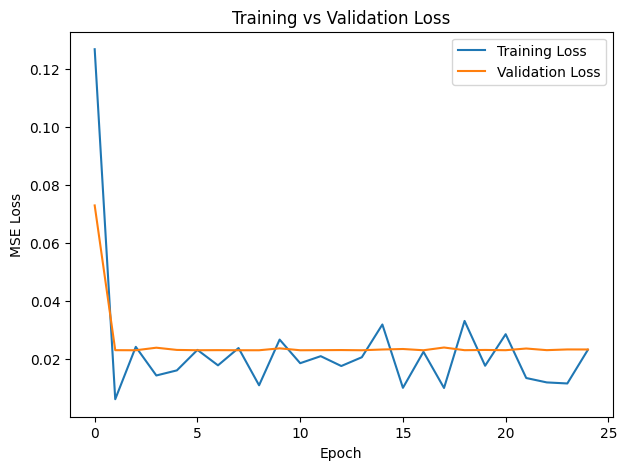


Final Test MSE: 0.0234


In [40]:
# --- Plot Training vs Validation loss ---
plt.figure(figsize=(7, 5))
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

# --- Final Test Evaluation ---
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    test_mse = torch.mean((y_test_pred.squeeze() - y_test_tensor) ** 2)
    print(f"\nFinal Test MSE: {test_mse.item():.4f}")

In [32]:
len(train_loss)

25

In [33]:
len(val_loss)

25